In [4]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import re
import time
import os

In [ ]:
# Creates a list of strings that match the files in the directory
nums = [str(num) for num in range(1, 9)]
data = ["route-finder_" + i + ".csv" for i in nums]

In [ ]:
# Creates a list of dataframes, one for each .csv file in the directory
route_finder_list = [pd.read_csv(climb) for climb in data]

In [ ]:
# Stacks all of the dataframes to make one big dataframe
climbs = pd.concat(route_finder_list).reset_index()

In [24]:
# Write out the Combined version of the data so that I have a csv with all of the data in it
# climbs.to_csv("utah_climbs.csv", index = False)

In [2]:
climbs = pd.read_csv('utah_climbs.csv')

In [3]:
# This Code creates two boolean factors for whether the climb is rated PG13 or R
pg13 = climbs.Rating.str.extract("(PG13)")
R = climbs.Rating.str.extract("(R)")
climbs["PG13"] = pg13 == "PG13"
climbs["R"] = R == "R"

In [4]:
# Remove PG13 and R from the "Rating" column
climbs["Rating"] = climbs.Rating.str.replace("(PG13|R)", "", regex = True)


In [5]:
# This Code Separates out the "Location" column into "State", "Region", "Location", "Crag", and "Wall"
locs = climbs.Location.apply(lambda x : x[::-1]).str.extract("([A-Za-z1-9& ]*)>*([A-Za-z1-9& ]*)>*([A-Za-z1-9 &]*)>*([A-Za-z1-9& ]*)>*([A-Za-z1-9& ]*)")
locs["State"] = locs[0].apply(lambda x : x[::-1]).apply(lambda x : x.strip())
locs["Region"] = locs[1].apply(lambda x : x[::-1]).apply(lambda x : x.strip())
locs["Location"] = locs[2].apply(lambda x : x[::-1]).apply(lambda x : x.strip())
locs["Crag"] = locs[3].apply(lambda x : x[::-1]).apply(lambda x : x.strip())
locs["Wall"] = locs[4].apply(lambda x : x[::-1]).apply(lambda x : x.strip())

In [6]:
# This Adds the new variables into the dataframe and drops "index" and "Your Stars"
climbs.drop(["Location"], axis=1, inplace=True)
climbs[["State", "Region", "Location", "Crag", "Wall"]] = locs.drop([0, 1, 2, 3, 4], axis=1).replace("", np.NaN)
climbs.drop(["Your Stars"], axis=1, inplace=True)
#climbs.drop(["index"], axis = 1, inplace = True)

In [7]:
type_names = ['Trad', 'Alpine', 'TR', 'Aid', 'Boulder', 'Mixed']

for type in type_names:
  climbs[type] = climbs['Route Type'].str.extract('(' + type + ')') == type

In [8]:
climbs.drop('Route Type', axis = 1, inplace = True)

In [129]:
climbs

,Route,URL,Avg Stars,Rating,Pitches,Length,Area Latitude,Area Longitude,PG13,R,...,Location,Crag,Wall,Trad,Alpine,TR,Aid,Boulder,Mixed,Rating_num
0,Tiki Man,https://www.mountainproject.com/route/10571855...,4.0,5.13c,1,60.0,38.49691,-109.31021,False,False,...,La Sal Mountains,Mill Creek,The Wicked Crag,False,False,False,False,False,False,13.6
1,The Bleeding,https://www.mountainproject.com/route/10813817...,4.0,5.14b,1,60.0,38.49691,-109.31021,False,False,...,La Sal Mountains,Mill Creek,The Wicked Crag,False,False,False,False,False,False,14.4
2,Doubloon,https://www.mountainproject.com/route/11953024...,3.0,5.14b,1,90.0,38.49691,-109.31021,False,False,...,La Sal Mountains,Mill Creek,The Wicked Crag,False,False,False,False,False,False,14.4
3,Prosthetics,https://www.mountainproject.com/route/11288012...,4.0,5.13d,1,90.0,38.49649,-109.31053,False,False,...,La Sal Mountains,Mill Creek,The Sunny Side,False,False,False,False,False,False,13.8
4,Donut Project,https://www.mountainproject.com/route/11607613...,3.0,5.14+,1,30.0,38.49649,-109.31053,False,False,...,La Sal Mountains,Mill Creek,The Sunny Side,False,False,False,False,False,False,14.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6102,Suavemente,https://www.mountainproject.com/route/12500311...,2.3,5.8,1,50.0,40.69886,-110.89815,False,False,...,Uinta Mountains,Lost & Found,NaN,False,False,False,False,False,False,8.5
6103,The Indecisive,https://www.mountainproject.com/route/12508882...,2.0,5.8,1,50.0,40.69886,-110.89815,False,False,...,Uinta Mountains,Lost & Found,NaN,False,False,False,False,False,False,8.5
6104,Crack 6,https://www.mountainproject.com/route/12333204...,2.5,5.8+,1,40.0,40.59798,-109.73133,False,False,...,Vernal Area,Dry Fork Canyon,NaN,False,False,True,False,False,False,8.7
6105,Pre-pubescent Pimpled Tortoises.,https://www.mountainproject.com/route/12063800...,3.0,5.7,1,30.0,40.89100,-109.76765,False,False,...,Flaming Gorge,Windy Ridge,NaN,False,False,False,False,False,False,7.5


In [43]:
subset = climbs.loc[1411:1412]

def findviews(soup):
  list = [thing.get_text().strip() for thing in soup.findAll('tr')]
  for i in list:
    if re.match('Page Views', i):
      return re.sub('\s+', ' ', i)

newcols = {
    "numVotes" : [],
    "numViews" : []
}

for i in range(subset.shape[0]):
    time.sleep(60)
    url = subset.iloc[i]['URL']
    r = requests.get(url)
    soup = BeautifulSoup(r.text, features = 'lxml')
    newcols["numVotes"].append(soup.find('span', {'id' : re.compile('starsWithAvgText')}).get_text().strip())
    newcols["numViews"].append(findviews(soup))


newData = pd.DataFrame.from_dict(newcols)
newData

,numVotes,numViews
0,Avg: 0 from 0\n votes,Page Views: 499 total · 4/month
1,Avg: 2.4 from 36\n votes,Page Views: 958 total · 12/month


In [44]:
def findyear(soup):
  list = [thing.get_text().strip() for thing in soup.findAll('tr')]
  for i in list:
    if re.match('Page Views', i):
      return re.sub('\s+', ' ', i)

'Page Views: 958 total · 12/month'

In [64]:
url = climbs.iloc[3395]['URL']

In [65]:
r = requests.get(url)

In [67]:
soup = BeautifulSoup(r.text)

In [80]:
soup.find('span', {'id' : re.compile('starsWithAvgText')}).get_text().strip()

'Avg: 3.7 from 352\n    votes'

In [50]:
def findyear(soup):
  list = [thing.get_text().strip() for thing in soup.findAll('tr')]
  for i in list:
    if re.match('Shared By', i):
      return re.sub('\s+', ' ', i)



In [51]:
findyear(soup)
# list = [thing.get_text().strip() for thing in soup.findAll('tr')]
# list[-2]

'Shared By: Richard M. Wright on Jul 23, 2003'

In [63]:
# Remove extra ratings to leave only the YSD system
climbs['Rating'] = climbs.Rating.str.extract("(5\.[0-9]{1,2}[a-d/\-+]{0,3})")

In [120]:
ratings = {}
rating_num = ['.2', '.3', '.3', '.4', '.5', '.5', '.6', '.7', '.7', '.8']
grades = ['a', 'a/b', '-', 'b', 'b/c', '', 'c', 'c/d', '+', 'd']

for i in ['5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']:
    for j in range(len(grades)):
        grade = '5.' + i + grades[j]
        numGrade = i + rating_num[j]
        ratings[grade] = numGrade

{'5.5a': '5.2',
 '5.5a/b': '5.3',
 '5.5-': '5.3',
 '5.5b': '5.4',
 '5.5b/c': '5.5',
 '5.5': '5.5',
 '5.5c': '5.6',
 '5.5c/d': '5.7',
 '5.5+': '5.7',
 '5.5d': '5.8',
 '5.6a': '6.2',
 '5.6a/b': '6.3',
 '5.6-': '6.3',
 '5.6b': '6.4',
 '5.6b/c': '6.5',
 '5.6': '6.5',
 '5.6c': '6.6',
 '5.6c/d': '6.7',
 '5.6+': '6.7',
 '5.6d': '6.8',
 '5.7a': '7.2',
 '5.7a/b': '7.3',
 '5.7-': '7.3',
 '5.7b': '7.4',
 '5.7b/c': '7.5',
 '5.7': '7.5',
 '5.7c': '7.6',
 '5.7c/d': '7.7',
 '5.7+': '7.7',
 '5.7d': '7.8',
 '5.8a': '8.2',
 '5.8a/b': '8.3',
 '5.8-': '8.3',
 '5.8b': '8.4',
 '5.8b/c': '8.5',
 '5.8': '8.5',
 '5.8c': '8.6',
 '5.8c/d': '8.7',
 '5.8+': '8.7',
 '5.8d': '8.8',
 '5.9a': '9.2',
 '5.9a/b': '9.3',
 '5.9-': '9.3',
 '5.9b': '9.4',
 '5.9b/c': '9.5',
 '5.9': '9.5',
 '5.9c': '9.6',
 '5.9c/d': '9.7',
 '5.9+': '9.7',
 '5.9d': '9.8',
 '5.10a': '10.2',
 '5.10a/b': '10.3',
 '5.10-': '10.3',
 '5.10b': '10.4',
 '5.10b/c': '10.5',
 '5.10': '10.5',
 '5.10c': '10.6',
 '5.10c/d': '10.7',
 '5.10+': '10.7',
 '5.10d'

In [128]:
climbs['Rating_num'] = climbs.Rating.replace(ratings).astype(float)

In [45]:

for i in range(10):
  url = climbs.iloc[3395]['URL']
  r = requests.get(url)
  soup = BeautifulSoup(r.text)
  soup.find('span', {'id' : re.compile('starsWithAvgText')}).get_text().strip()

In [ ]:
url = "https://www.mountainproject.com/gyms/utah"

In [1]:
climbs

NameError: name 'climbs' is not defined

In [131]:
import seaborn as sns

In [141]:
climbs['Avg Stars'].mask(climbs['Avg Stars'] == -1, np.nan, inplace = True)

<Axes: xlabel='Region', ylabel='Avg Stars'>

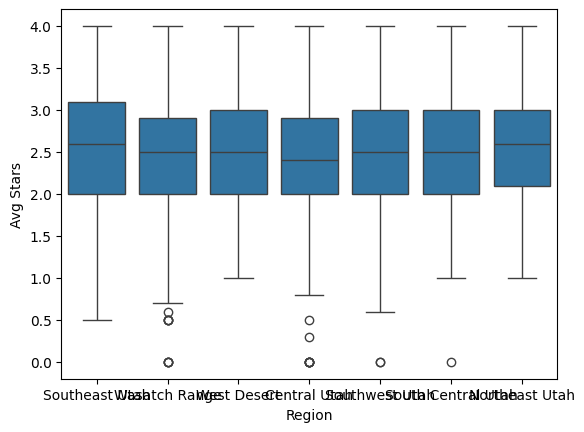

In [147]:
sns.boxplot(y = 'Avg Stars', x = 'Region', data = climbs)

In [5]:
climbs = pd.read_csv('utah_climbs.csv')
climbs

,Route,URL,Avg Stars,Rating,Pitches,Length,Area Latitude,Area Longitude,PG13,R,...,Location,Crag,Wall,Trad,Alpine,TR,Aid,Boulder,Mixed,Rating_num
0,Tiki Man,https://www.mountainproject.com/route/10571855...,4.0,5.13c,1,60.0,38.49691,-109.31021,False,False,...,La Sal Mountains,Mill Creek,The Wicked Crag,False,False,False,False,False,False,13.6
1,The Bleeding,https://www.mountainproject.com/route/10813817...,4.0,5.14b,1,60.0,38.49691,-109.31021,False,False,...,La Sal Mountains,Mill Creek,The Wicked Crag,False,False,False,False,False,False,14.4
2,Doubloon,https://www.mountainproject.com/route/11953024...,3.0,5.14b,1,90.0,38.49691,-109.31021,False,False,...,La Sal Mountains,Mill Creek,The Wicked Crag,False,False,False,False,False,False,14.4
3,Prosthetics,https://www.mountainproject.com/route/11288012...,4.0,5.13d,1,90.0,38.49649,-109.31053,False,False,...,La Sal Mountains,Mill Creek,The Sunny Side,False,False,False,False,False,False,13.8
4,Donut Project,https://www.mountainproject.com/route/11607613...,3.0,5.14+,1,30.0,38.49649,-109.31053,False,False,...,La Sal Mountains,Mill Creek,The Sunny Side,False,False,False,False,False,False,14.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6102,Suavemente,https://www.mountainproject.com/route/12500311...,2.3,5.8,1,50.0,40.69886,-110.89815,False,False,...,Uinta Mountains,Lost & Found,NaN,False,False,False,False,False,False,8.5
6103,The Indecisive,https://www.mountainproject.com/route/12508882...,2.0,5.8,1,50.0,40.69886,-110.89815,False,False,...,Uinta Mountains,Lost & Found,NaN,False,False,False,False,False,False,8.5
6104,Crack 6,https://www.mountainproject.com/route/12333204...,2.5,5.8+,1,40.0,40.59798,-109.73133,False,False,...,Vernal Area,Dry Fork Canyon,NaN,False,False,True,False,False,False,8.7
6105,Pre-pubescent Pimpled Tortoises.,https://www.mountainproject.com/route/12063800...,3.0,5.7,1,30.0,40.89100,-109.76765,False,False,...,Flaming Gorge,Windy Ridge,NaN,False,False,False,False,False,False,7.5


In [6]:
climbs[0:3]

,Route,URL,Avg Stars,Rating,Pitches,Length,Area Latitude,Area Longitude,PG13,R,...,Location,Crag,Wall,Trad,Alpine,TR,Aid,Boulder,Mixed,Rating_num
0,Tiki Man,https://www.mountainproject.com/route/10571855...,4.0,5.13c,1,60.0,38.49691,-109.31021,False,False,...,La Sal Mountains,Mill Creek,The Wicked Crag,False,False,False,False,False,False,13.6
1,The Bleeding,https://www.mountainproject.com/route/10813817...,4.0,5.14b,1,60.0,38.49691,-109.31021,False,False,...,La Sal Mountains,Mill Creek,The Wicked Crag,False,False,False,False,False,False,14.4
2,Doubloon,https://www.mountainproject.com/route/11953024...,3.0,5.14b,1,90.0,38.49691,-109.31021,False,False,...,La Sal Mountains,Mill Creek,The Wicked Crag,False,False,False,False,False,False,14.4


In [19]:
subset = climbs[:2]
def findviews(soup):
  list = [thing.get_text().strip() for thing in soup.findAll('tr')]
  for i in list:
    if re.match('Page Views', i):
      return re.sub('\s+', ' ', i)
    
def findyear(soup):
  list = [thing.get_text().strip() for thing in soup.findAll('tr')]
  for i in list:
    if re.match('Shared By', i):
      return re.sub('\s+', ' ', i)

newcols = {
    "numVotes" : [],
    "numViews" : [],
    "Shared_by" : []
}

for i in range(subset.shape[0]):
    time.sleep(60)
    url = subset.iloc[i]['URL']
    r = requests.get(url)
    soup = BeautifulSoup(r.text, features = 'lxml')
    newcols["numVotes"].append(soup.find('span', {'id' : re.compile('starsWithAvgText')}).get_text().strip())
    newcols["numViews"].append(findviews(soup))
    newcols["Shared_by"].append(findyear(soup))
    if i % 60 == 0:
      print('So far I have completed', i, 'number of rows! Only', climbs.shape[0] - i, "left to go")



newData = pd.DataFrame.from_dict(newcols)
newData

So far I have completed 0 number of rows! Only 6107 left to go


,numVotes,numViews,Shared_by
0,Avg: 4 from 11\n votes,"Page Views: 9,562 total · 42/month","Shared By: Anonymous Coward on Dec 31, 2004"
1,Avg: 4 from 2\n votes,"Page Views: 6,245 total · 49/month","Shared By: Orphaned on May 12, 2013"


In [72]:
# cleaning the newData from the scraping

newData["numVotes"] = newData.numVotes.str.extract("(\d+)\n")
newData[["numViews", "ViewsPerMonth"]] = newData.numViews.str.replace(',', '').str.extract('(\d+) total.{3}(\d+)/month')
newData[['Shared_by', 'Month', 'Day', 'Year']] = newData.Year.str.extract('Shared By: (.+)on ([JFMASOND][a-z]{2}) (\d{1,2}), (\d{4})')

In [73]:
climbs.iloc[6102]['URL']
newData

,numVotes,numViews,Year,ViewsPerMonth,Shared_by,Month,Day
0,11,9559,2004,42,Anonymous Coward,Dec,31
1,2,6238,2013,49,Orphaned,May,12
2,1,953,2020,25,Ben Crawford,Sep,9
3,4,2868,2017,36,ben jammin,May,7
4,1,1560,2018,26,j wharton,Nov,8
...,...,...,...,...,...,...,...
6102,3,51,2023,42,The Possum's Protégé,Sep,25
6103,2,44,2023,44,Craig Martin,Oct,9
6104,2,69,2022,6,Joe Kitz,Oct,27
6105,1,348,2021,11,Paully,May,1


In [74]:
newData[['numVotes', 'numViews', 'ViewsPerMonth', 'Day', 'Year']] = newData[['numVotes', 'numViews', 'ViewsPerMonth', 'Day', 'Year']].astype(int)

In [83]:
newData.Shared_by = newData.Shared_by.str.strip()
newData

,numVotes,numViews,Year,ViewsPerMonth,Shared_by,Month,Day
0,11,9559,2004,42,Anonymous Coward,Dec,31
1,2,6238,2013,49,Orphaned,May,12
2,1,953,2020,25,Ben Crawford,Sep,9
3,4,2868,2017,36,ben jammin,May,7
4,1,1560,2018,26,j wharton,Nov,8
...,...,...,...,...,...,...,...
6102,3,51,2023,42,The Possum's Protégé,Sep,25
6103,2,44,2023,44,Craig Martin,Oct,9
6104,2,69,2022,6,Joe Kitz,Oct,27
6105,1,348,2021,11,Paully,May,1


In [89]:
month_dict = {
    'Jan' : 1,
    'Feb' : 2,
    'Mar' : 3,
    'Apr' : 4,
    'May' : 5,
    'Jun' : 6,
    'Jul' : 7,
    'Aug' : 8,
    'Sep' : 9,
    'Oct' : 10,
    'Nov' : 11,
    'Dec' : 12
}
newData.Month.replace(month_dict, inplace = True)

In [94]:
newData['Date'] = pd.to_datetime(newData[['Year', 'Month', 'Day']])

In [99]:
climbs = pd.read_csv('utah_climbs.csv')

In [111]:
climbs[['Route', 'Shared_by']].groupby('Shared_by').count().sort_values('Route', ascending = False)

,Route
Shared_by,
-Jeremy Nelson,1
Gregory Cooper,1
Ryan Lauck,1
S E,1
Greg Koeppen,1
...,...
SM Ryan,105
Jeremy Steck,124
GRK,149


In [122]:
climbs.columns

Index(['Route', 'URL', 'Avg Stars', 'Rating', 'Pitches', 'Length',
       'Area Latitude', 'Area Longitude', 'PG13', 'R', 'State', 'Region',
       'Location', 'Crag', 'Wall', 'Trad', 'Alpine', 'TR', 'Aid', 'Boulder',
       'Mixed', 'Rating_num', 'numVotes', 'numViews', 'Year', 'ViewsPerMonth',
       'Shared_by', 'Month', 'Day', 'Date'],
      dtype='object')

<Axes: xlabel='Rating_num', ylabel='numViews'>

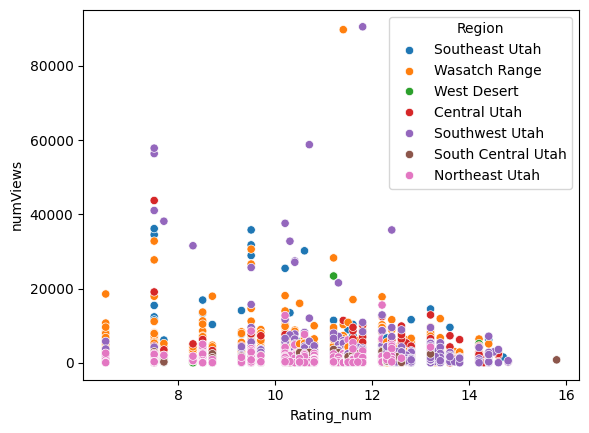

In [133]:

sns.scatterplot(x = "Rating_num", y = "numVotes", data = climbs, hue = 'Region')

In [84]:
climbs[['numVotes', 'numViews', 'Year', 'ViewsPerMonth', 'Shared_by', 'Month', 'Day']] = newData
climbs

,Route,URL,Avg Stars,Rating,Pitches,Length,Area Latitude,Area Longitude,PG13,R,...,Boulder,Mixed,Rating_num,numVotes,numViews,Year,ViewsPerMonth,Shared_by,Month,Day
0,Tiki Man,https://www.mountainproject.com/route/10571855...,4.0,5.13c,1,60.0,38.49691,-109.31021,False,False,...,False,False,13.6,11,9559,2004,42,Anonymous Coward,Dec,31
1,The Bleeding,https://www.mountainproject.com/route/10813817...,4.0,5.14b,1,60.0,38.49691,-109.31021,False,False,...,False,False,14.4,2,6238,2013,49,Orphaned,May,12
2,Doubloon,https://www.mountainproject.com/route/11953024...,3.0,5.14b,1,90.0,38.49691,-109.31021,False,False,...,False,False,14.4,1,953,2020,25,Ben Crawford,Sep,9
3,Prosthetics,https://www.mountainproject.com/route/11288012...,4.0,5.13d,1,90.0,38.49649,-109.31053,False,False,...,False,False,13.8,4,2868,2017,36,ben jammin,May,7
4,Donut Project,https://www.mountainproject.com/route/11607613...,3.0,5.14+,1,30.0,38.49649,-109.31053,False,False,...,False,False,14.7,1,1560,2018,26,j wharton,Nov,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6102,Suavemente,https://www.mountainproject.com/route/12500311...,2.3,5.8,1,50.0,40.69886,-110.89815,False,False,...,False,False,8.5,3,51,2023,42,The Possum's Protégé,Sep,25
6103,The Indecisive,https://www.mountainproject.com/route/12508882...,2.0,5.8,1,50.0,40.69886,-110.89815,False,False,...,False,False,8.5,2,44,2023,44,Craig Martin,Oct,9
6104,Crack 6,https://www.mountainproject.com/route/12333204...,2.5,5.8+,1,40.0,40.59798,-109.73133,False,False,...,False,False,8.7,2,69,2022,6,Joe Kitz,Oct,27
6105,Pre-pubescent Pimpled Tortoises.,https://www.mountainproject.com/route/12063800...,3.0,5.7,1,30.0,40.89100,-109.76765,False,False,...,False,False,7.5,1,348,2021,11,Paully,May,1


In [70]:
newData = pd.read_csv('climbs.csv')[['numVotes', 'numViews', 'Year']]

In [ ]:
r = requests.get(url)

In [ ]:
soup = BeautifulSoup(r.text)

In [ ]:
links = soup.find_all('a')

def hasGym(link):
    try:
        if "gym/" in link["href"]:
            return True
        else:
            return False
    except:
        return False

gyms = [link.text for link in links if hasGym(link)]
gyms

['Add Missing Gym',
 'AlpenFit - Indoor Training for Outdoo…',
 'Contact Climbing',
 'Dimple Dell',
 'Double-Diamond Climbing Wall',
 'Elevation Rock Gym',
 'Fit Stop Rock Climbing Gym',
 'iROCK Utah',
 'Lehi Legacy Center',
 'Momentum Indoor Climbing Gym',
 'Momentum Lehi',
 'Momentum Millcreek',
 'Salt Lake Bouldering Project',
 'SUU Climbing Gym',
 'Taylorsville Rec Center',
 'Technical Training Center',
 'The Front Climbing Club',
 'The Front Climbing Club',
 'The Front Climbing Club - South Main',
 'The Project',
 'The Quarry',
 'The Scratch Pad',
 'The Summit',
 'Uintah Recreation Community Center',
 'Ultimate Sports Arena',
 'Washington City Community Center',
 'West Valley Family Fitness Center cli…']

In [1]:
import pandas as pd

In [2]:
climbs = pd.read_csv('utah_climbs.csv')
climbs

,Route,URL,Avg Stars,Rating,Pitches,Length,Area Latitude,Area Longitude,PG13,R,...,Mixed,Rating_num,numVotes,numViews,Year,ViewsPerMonth,Shared_by,Month,Day,Date
0,Tiki Man,https://www.mountainproject.com/route/10571855...,4.0,5.13c,1,60.0,38.49691,-109.31021,False,False,...,False,13.6,11,9559,2004,42,Anonymous Coward,12,31,2004-12-31
1,The Bleeding,https://www.mountainproject.com/route/10813817...,4.0,5.14b,1,60.0,38.49691,-109.31021,False,False,...,False,14.4,2,6238,2013,49,Orphaned,5,12,2013-05-12
2,Doubloon,https://www.mountainproject.com/route/11953024...,3.0,5.14b,1,90.0,38.49691,-109.31021,False,False,...,False,14.4,1,953,2020,25,Ben Crawford,9,9,2020-09-09
3,Prosthetics,https://www.mountainproject.com/route/11288012...,4.0,5.13d,1,90.0,38.49649,-109.31053,False,False,...,False,13.8,4,2868,2017,36,ben jammin,5,7,2017-05-07
4,Donut Project,https://www.mountainproject.com/route/11607613...,3.0,5.14+,1,30.0,38.49649,-109.31053,False,False,...,False,14.7,1,1560,2018,26,j wharton,11,8,2018-11-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6102,Suavemente,https://www.mountainproject.com/route/12500311...,2.3,5.8,1,50.0,40.69886,-110.89815,False,False,...,False,8.5,3,51,2023,42,The Possum's Protégé,9,25,2023-09-25
6103,The Indecisive,https://www.mountainproject.com/route/12508882...,2.0,5.8,1,50.0,40.69886,-110.89815,False,False,...,False,8.5,2,44,2023,44,Craig Martin,10,9,2023-10-09
6104,Crack 6,https://www.mountainproject.com/route/12333204...,2.5,5.8+,1,40.0,40.59798,-109.73133,False,False,...,False,8.7,2,69,2022,6,Joe Kitz,10,27,2022-10-27
6105,Pre-pubescent Pimpled Tortoises.,https://www.mountainproject.com/route/12063800...,3.0,5.7,1,30.0,40.89100,-109.76765,False,False,...,False,7.5,1,348,2021,11,Paully,5,1,2021-05-01


In [1]:
import clean_climbing as pc

In [2]:
climbs = pc.dataConcat(['route-finder_1.csv', 'route-finder_2.csv'], 
              path = "In_Progress_Files/")
pc.dataClean(climbs, inplace = True)

,Route,URL,Avg Stars,Rating,Pitches,Length,Area Latitude,Area Longitude,PG13,R,...,Crag,Wall,Trad,Alpine,TR,Aid,Boulder,Mixed,Sport,Rating_num
0,Tiki Man,https://www.mountainproject.com/route/10571855...,4.0,5.13c,1,60.0,38.49691,-109.31021,False,False,...,Mill Creek,The Wicked Crag,False,False,False,False,False,False,True,13.6
1,The Bleeding,https://www.mountainproject.com/route/10813817...,4.0,5.14b,1,60.0,38.49691,-109.31021,False,False,...,Mill Creek,The Wicked Crag,False,False,False,False,False,False,True,14.4
2,Doubloon,https://www.mountainproject.com/route/11953024...,3.0,5.14b,1,90.0,38.49691,-109.31021,False,False,...,Mill Creek,The Wicked Crag,False,False,False,False,False,False,True,14.4
3,Prosthetics,https://www.mountainproject.com/route/11288012...,4.0,5.13d,1,90.0,38.49649,-109.31053,False,False,...,Mill Creek,The Sunny Side,False,False,False,False,False,False,True,13.8
4,Donut Project,https://www.mountainproject.com/route/11607613...,3.0,5.14+,1,30.0,38.49649,-109.31053,False,False,...,Mill Creek,The Sunny Side,False,False,False,False,False,False,True,14.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,On Deck,https://www.mountainproject.com/route/10679127...,2.3,5.9-,1,NaN,40.60199,-109.43005,False,False,...,East Battle Ship,NaN,False,False,False,False,False,False,True,9.3
771,Crack 3,https://www.mountainproject.com/route/12333194...,3.4,5.9+,1,50.0,40.59798,-109.73133,False,False,...,Dry Fork Canyon,NaN,False,False,True,False,False,False,True,9.7
772,Lightning Fingers,https://www.mountainproject.com/route/12063803...,2.3,5.9+,1,40.0,40.89100,-109.76765,False,False,...,Windy Ridge,NaN,False,False,False,False,False,False,True,9.7
773,Reedmeister,https://www.mountainproject.com/route/12081881...,3.0,5.9,1,90.0,40.90656,-109.79332,False,False,...,Windy Ridge,NaN,False,False,False,False,False,False,True,9.5


,Route,URL,Avg Stars,Rating,Pitches,Length,Area Latitude,Area Longitude,PG13,R,...,Crag,Wall,Trad,Alpine,TR,Aid,Boulder,Mixed,Sport,Rating_num
0,Tiki Man,https://www.mountainproject.com/route/10571855...,4.0,5.13c,1,60.0,38.49691,-109.31021,False,False,...,Mill Creek,The Wicked Crag,False,False,False,False,False,False,True,13.6
1,The Bleeding,https://www.mountainproject.com/route/10813817...,4.0,5.14b,1,60.0,38.49691,-109.31021,False,False,...,Mill Creek,The Wicked Crag,False,False,False,False,False,False,True,14.4
2,Doubloon,https://www.mountainproject.com/route/11953024...,3.0,5.14b,1,90.0,38.49691,-109.31021,False,False,...,Mill Creek,The Wicked Crag,False,False,False,False,False,False,True,14.4
3,Prosthetics,https://www.mountainproject.com/route/11288012...,4.0,5.13d,1,90.0,38.49649,-109.31053,False,False,...,Mill Creek,The Sunny Side,False,False,False,False,False,False,True,13.8
4,Donut Project,https://www.mountainproject.com/route/11607613...,3.0,5.14+,1,30.0,38.49649,-109.31053,False,False,...,Mill Creek,The Sunny Side,False,False,False,False,False,False,True,14.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,On Deck,https://www.mountainproject.com/route/10679127...,2.3,5.9-,1,NaN,40.60199,-109.43005,False,False,...,East Battle Ship,NaN,False,False,False,False,False,False,True,9.3
771,Crack 3,https://www.mountainproject.com/route/12333194...,3.4,5.9+,1,50.0,40.59798,-109.73133,False,False,...,Dry Fork Canyon,NaN,False,False,True,False,False,False,True,9.7
772,Lightning Fingers,https://www.mountainproject.com/route/12063803...,2.3,5.9+,1,40.0,40.89100,-109.76765,False,False,...,Windy Ridge,NaN,False,False,False,False,False,False,True,9.7
773,Reedmeister,https://www.mountainproject.com/route/12081881...,3.0,5.9,1,90.0,40.90656,-109.79332,False,False,...,Windy Ridge,NaN,False,False,False,False,False,False,True,9.5
